# Imports

In [11]:
import fiftyone as fo
import fiftyone.utils.coco as fouc
from fiftyone.core.labels import Detection
from PIL import Image

import torch
import torch.nn as nn
import torch.utils
import torch.utils.data

import torchvision
from torchvision.models.segmentation import fcn_resnet50, FCN_ResNet50_Weights
from torchvision.models.detection.mask_rcnn import maskrcnn_resnet50_fpn, MaskRCNNPredictor
from torchvision.models.detection import MaskRCNN_ResNet50_FPN_Weights
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor

import matplotlib.pyplot as plt
import numpy as np

import os
import importlib
import sys
from pathlib import Path
from datetime import datetime

import utils
import train
from train import train_one_epoch, evaluate
import transforms as T
importlib.reload(T)

here = os.getcwd()
sys.path.append(os.path.join(here, '..'))
import DatasetLoaders
importlib.reload(DatasetLoaders)
from DatasetLoaders import HRSIDSegmentationDataset
import MaskRCNN_model_wrapper
importlib.reload(MaskRCNN_model_wrapper)
# from MaskRCNN_model_wrapper import MaskRCNNWrapper
from MaskRCNN_model_wrapper import do_training, save_model, get_model
import fiftyone_evaluation as fiftyone_evaluation
importlib.reload(fiftyone_evaluation)



<module 'fiftyone_evaluation' from '/home/k3vinli/ENEE439/Capstone/models/mask_rcnn/../fiftyone_evaluation.py'>

# Defining Functions

In [12]:
def get_transform_lee():
    transforms = []

    transforms.append(T.PILToTensor())
    transforms.append(T.ConvertImageDtype(torch.float))
    transforms.append(T.LeeFilter(5))
    
    return T.Compose(transforms)

# Loading Dataset

In [13]:
# get path to directory above
p = Path()
top_dir = p.absolute().parents[1]
top_dir

PosixPath('/home/k3vinli/ENEE439/Capstone')

In [14]:
name = "HRSID_train"
if name in fo.list_datasets():
    dataset_train = fo.load_dataset(name)
else:
    dataset_dir = top_dir / "Datasets" / "HRSID"
    label_path = top_dir / "Datasets"/ "HRSID" / "annotations" / "train2017.json"
    # The type of the dataset being imported
    dataset_type = fo.types.COCODetectionDataset

    dataset_train = fo.Dataset.from_dir(
        dataset_dir=dataset_dir,
        dataset_type=dataset_type,
        name=name,
        labels_path=label_path
    )

In [15]:
name = "HRSID_test"
if name in fo.list_datasets():
    dataset_test = fo.load_dataset(name)
else:
    dataset_dir = top_dir / "Datasets" / "HRSID"
    label_path = top_dir / "Datasets"/ "HRSID" / "annotations" / "test2017.json"
    # The type of the dataset being imported
    dataset_type = fo.types.COCODetectionDataset

    dataset_test = fo.Dataset.from_dir(
        dataset_dir=dataset_dir,
        dataset_type=dataset_type,
        name=name,
        labels_path=label_path
    )

In [16]:
dataset_train.compute_metadata()
dataset_test.compute_metadata()

# View Loaded Datasets

In [58]:
session = fo.launch_app()

# Training Model with Lee filtered Images

In [9]:
model = get_model(2, True)

In [17]:
HRSID_torch_train_lee = HRSIDSegmentationDataset(dataset_train, transforms=get_transform_lee())
HRSID_torch_test_lee = HRSIDSegmentationDataset(dataset_test, transforms=get_transform_lee())

In [11]:
do_training(model, HRSID_torch_train_lee, HRSID_torch_test_lee, num_epochs=45, step_size=15)

Using cuda


/home/k3vinli/ENEE439/Capstone/models/mask_rcnn/../DatasetLoaders.py:71: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /opt/conda/conda-bld/pytorch_1678402411778/work/torch/csrc/utils/tensor_new.cpp:245.)
  masks=torch.as_tensor(masks, dtype=torch.uint8)
/home/k3vinli/ENEE439/Capstone/models/mask_rcnn/../DatasetLoaders.py:71: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /opt/conda/conda-bld/pytorch_1678402411778/work/torch/csrc/utils/tensor_new.cpp:245.)
  masks=torch.as_tensor(masks, dtype=torch.uint8)
/home/k3vinli/ENEE439/Capstone/models/mask_rcnn/../DatasetLoaders.py:71: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely s

Epoch: [0]  [  0/911]  eta: 1:53:32  lr: 0.000010  loss: 5.3195 (5.3195)  loss_classifier: 0.4150 (0.4150)  loss_box_reg: 0.0863 (0.0863)  loss_mask: 2.4571 (2.4571)  loss_objectness: 2.0857 (2.0857)  loss_rpn_box_reg: 0.2754 (0.2754)  time: 7.4775  data: 3.6880  max mem: 2677
Epoch: [0]  [ 10/911]  eta: 0:15:38  lr: 0.000065  loss: 2.8713 (3.2226)  loss_classifier: 0.3902 (0.3887)  loss_box_reg: 0.1859 (0.1591)  loss_mask: 1.9815 (1.9698)  loss_objectness: 0.2574 (0.6263)  loss_rpn_box_reg: 0.0346 (0.0787)  time: 1.0421  data: 0.3457  max mem: 2840
Epoch: [0]  [ 20/911]  eta: 0:10:53  lr: 0.000120  loss: 2.7336 (3.0950)  loss_classifier: 0.3626 (0.3525)  loss_box_reg: 0.1232 (0.1440)  loss_mask: 1.6844 (1.7504)  loss_objectness: 0.1269 (0.7586)  loss_rpn_box_reg: 0.0268 (0.0896)  time: 0.3961  data: 0.0119  max mem: 2882
Epoch: [0]  [ 30/911]  eta: 0:09:11  lr: 0.000175  loss: 1.7300 (2.6358)  loss_classifier: 0.2665 (0.3203)  loss_box_reg: 0.1247 (0.1490)  loss_mask: 1.2706 (1.4739) 

/home/k3vinli/ENEE439/Capstone/models/mask_rcnn/../DatasetLoaders.py:71: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /opt/conda/conda-bld/pytorch_1678402411778/work/torch/csrc/utils/tensor_new.cpp:245.)
  masks=torch.as_tensor(masks, dtype=torch.uint8)


creating index...
index created!
Test:  [  0/981]  eta: 0:26:03  model_time: 0.3299 (0.3299)  evaluator_time: 0.0974 (0.0974)  time: 1.5936  data: 1.1610  max mem: 4141
Test:  [100/981]  eta: 0:02:26  model_time: 0.0948 (0.1115)  evaluator_time: 0.0130 (0.0197)  time: 0.1316  data: 0.0116  max mem: 4141
Test:  [200/981]  eta: 0:02:12  model_time: 0.0993 (0.1086)  evaluator_time: 0.0130 (0.0204)  time: 0.2055  data: 0.0622  max mem: 4141
Test:  [300/981]  eta: 0:02:00  model_time: 0.0963 (0.1085)  evaluator_time: 0.0162 (0.0226)  time: 0.1691  data: 0.0278  max mem: 4141
Test:  [400/981]  eta: 0:01:39  model_time: 0.0931 (0.1070)  evaluator_time: 0.0134 (0.0225)  time: 0.1266  data: 0.0095  max mem: 4141
Test:  [500/981]  eta: 0:01:18  model_time: 0.1040 (0.1057)  evaluator_time: 0.0218 (0.0220)  time: 0.1428  data: 0.0107  max mem: 4141
Test:  [600/981]  eta: 0:01:00  model_time: 0.0991 (0.1048)  evaluator_time: 0.0230 (0.0214)  time: 0.1507  data: 0.0188  max mem: 4141
Test:  [700/981

In [12]:
save_model(model, "maskrcnn_hrsid_pre_lee_e40_lr005_m5_step15.pt")

# Training with Transformed Images

In [17]:
def get_transform_HF_jitter():
    transforms = []

    transforms.append(T.PILToTensor())
    transforms.append(T.ConvertImageDtype(torch.float))
    transforms.append(T.RandomHorizontalFlip())
    transforms.append(T.ScaleJitter((800, 800)))
    
    return T.Compose(transforms)

In [18]:
model = get_model(2, True)

In [19]:
HRSID_torch_train_HF_jitter = HRSIDSegmentationDataset(dataset_train, transforms=get_transform_HF_jitter())
HRSID_torch_test_HF_jitter = HRSIDSegmentationDataset(dataset_test, transforms=get_transform_HF_jitter())

In [ ]:
do_training(model, HRSID_torch_train_HF_jitter, HRSID_torch_test_HF_jitter, num_epochs=45, step_size=15)

In [ ]:
save_model(model, "maskrcnn_hrsid_pre_HF_jitter_e45_lr005_m5_step15.pt")

# Loading MaskRCNN Model Trained on Transformed Images

In [18]:
model = get_model(2, True)
PATH = "maskrcnn_weights/maskrcnn_hrsid_pre_lee_e40_lr005_m5_step15.pt"
model.load_state_dict(torch.load(PATH))
model.eval() # Puts model into evaluation mode

MaskRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(in

In [19]:
HRSID_torch_train_lee = HRSIDSegmentationDataset(dataset_train, transforms=get_transform_lee())
HRSID_torch_test_lee = HRSIDSegmentationDataset(dataset_test, transforms=get_transform_lee())

In [20]:
fiftyone_evaluation.add_segmentations(model, HRSID_torch_test_lee, dataset_test, field_name="predictions_lee", seg_field_name="seg_predictions_lee")


Using device cuda
 100% |███████████████| 1961/1961 [13.4m elapsed, 0s remaining, 3.4 samples/s]      


In [ ]:
# bounding box IOUs
results = fo.evaluate_detections(
    dataset_test, 
    "predictions_lee", 
    classes=["ship"],
    eval_key="eval", 
    compute_mAP=True,
    gt_field='detections'
)
print(results.mAP())
results.print_report()

Evaluating detections...
 100% |███████████████| 1961/1961 [16.3s elapsed, 0s remaining, 156.7 samples/s]      
Performing IoU sweep...
 100% |███████████████| 1961/1961 [11.7s elapsed, 0s remaining, 180.9 samples/s]      
0.5993661261881176
              precision    recall  f1-score   support

        ship       0.78      0.86      0.82      5921

   micro avg       0.78      0.86      0.82      5921
   macro avg       0.78      0.86      0.82      5921
weighted avg       0.78      0.86      0.82      5921



In [23]:
# segmentation IOUs
results = fo.evaluate_segmentations(
    dataset_test, 
    "seg_predictions_lee", 
    classes=["ship"],
    eval_key="eval_seg", 
    compute_mAP=True,
    gt_field='segmentations',
    use_masks=True
)
print(results.mAP())
results.print_report()

Evaluating detections...
 100% |███████████████| 1961/1961 [41.6s elapsed, 0s remaining, 69.7 samples/s]      
Performing IoU sweep...
 100% |███████████████| 1961/1961 [37.7s elapsed, 0s remaining, 69.2 samples/s]      
0.0007700149807837496
              precision    recall  f1-score   support

        ship       0.04      0.04      0.04      5921

   micro avg       0.04      0.04      0.04      5921
   macro avg       0.04      0.04      0.04      5921
weighted avg       0.04      0.04      0.04      5921



In [ ]:
fiftyone_evaluation.add_segmentations(model, HRSID_torch_train_lee, dataset_train, field_name="predictions_lee", seg_field_name="seg_predictions_lee")


Using device cuda
 100% |███████████████| 3642/3642 [23.7m elapsed, 0s remaining, 4.6 samples/s]      


In [ ]:
# bounding box IOUs
results = fo.evaluate_detections(
    dataset_train, 
    "predictions_lee", 
    classes=["ship"],
    eval_key="eval", 
    compute_mAP=True,
    gt_field='detections'
)
print(results.mAP())
results.print_report()

Evaluating detections...
 100% |███████████████| 3642/3642 [28.7s elapsed, 0s remaining, 115.3 samples/s]      
Performing IoU sweep...
 100% |███████████████| 3642/3642 [21.5s elapsed, 0s remaining, 157.6 samples/s]      
0.748495449873412
              precision    recall  f1-score   support

        ship       0.84      0.93      0.89     11047

   micro avg       0.84      0.93      0.89     11047
   macro avg       0.84      0.93      0.89     11047
weighted avg       0.84      0.93      0.89     11047



In [ ]:
# segmentation IOUs
results = fo.evaluate_detections(
    dataset_train, 
    "seg_predictions_lee", 
    classes=["ship"],
    eval_key="eval_seg", 
    compute_mAP=True,
    gt_field='segmentations',
    use_masks=True
)
print(results.mAP())
results.print_report()

Evaluating detections...
 100% |███████████████| 3642/3642 [1.1m elapsed, 0s remaining, 67.9 samples/s]       
Performing IoU sweep...
 100% |███████████████| 3642/3642 [58.3s elapsed, 0s remaining, 74.1 samples/s]      
0.0006173922822233338
              precision    recall  f1-score   support

        ship       0.04      0.04      0.04     11047

   micro avg       0.04      0.04      0.04     11047
   macro avg       0.04      0.04      0.04     11047
weighted avg       0.04      0.04      0.04     11047



# Exporting Results

In [52]:
EXPORT_PATH = os.path.abspath("model_results/mask_rcnn_lee_bbox_testing.json")
dataset_test.export(
    dataset_type=fo.types.COCODetectionDataset,
    labels_path=EXPORT_PATH,
    label_field='predictions_lee'
)

 100% |███████████████| 1961/1961 [9.3s elapsed, 0s remaining, 209.8 samples/s]      


In [53]:
EXPORT_PATH = os.path.abspath("model_results/mask_rcnn_lee_segs_testing.json")
dataset_test.export(
    dataset_type=fo.types.COCODetectionDataset,
    labels_path=EXPORT_PATH,
    label_field='seg_predictions_lee'
)

 100% |███████████████| 1961/1961 [54.9s elapsed, 0s remaining, 60.5 samples/s]      


In [54]:
EXPORT_PATH = os.path.abspath("model_results/mask_rcnn_lee_bbox_train.json")
dataset_train.export(
    dataset_type=fo.types.COCODetectionDataset,
    labels_path=EXPORT_PATH,
    label_field='predictions_lee'
)

 100% |███████████████| 3642/3642 [16.4s elapsed, 0s remaining, 199.8 samples/s]      


In [55]:
EXPORT_PATH = os.path.abspath("model_results/mask_rcnn_lee_bsegs_train.json")
dataset_train.export(
    dataset_type=fo.types.COCODetectionDataset,
    labels_path=EXPORT_PATH,
    label_field='seg_predictions_lee'
)

 100% |███████████████| 3642/3642 [1.7m elapsed, 0s remaining, 70.2 samples/s]      


# Viewing Results


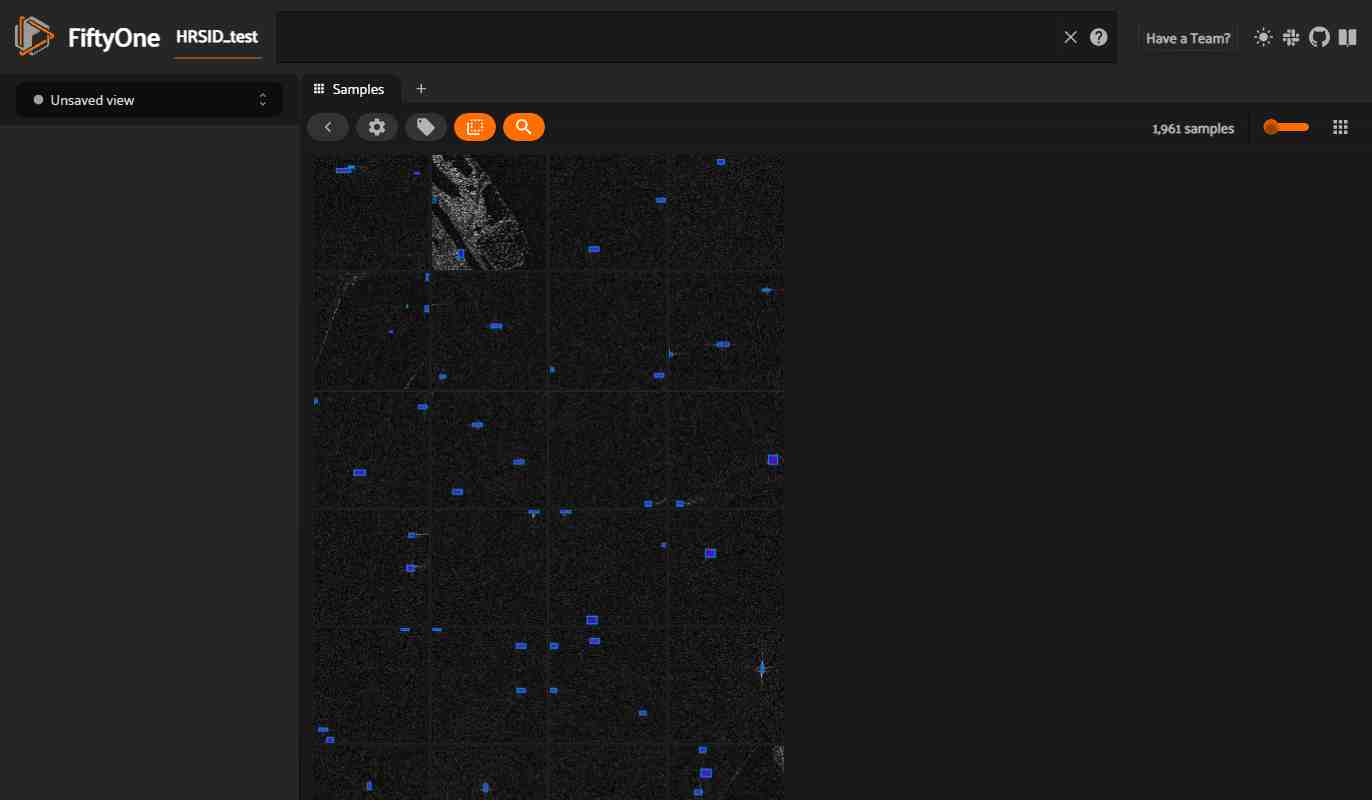

In [25]:
# View results
session.view = dataset_test.sort_by("eval_fp", reverse=True)


# Testing evaluation functions on subset

In [107]:
importlib.reload(fiftyone_evaluation)

<module 'fiftyone_evaluation' from '/home/k3vinli/ENEE439/Capstone/models/mask_rcnn/../fiftyone_evaluation.py'>

In [1]:
small_set = dataset_test[:8]
torch_small_set = HRSIDSegmentationDataset(small_set, transforms=get_transform_lee())

NameError: name 'dataset_test' is not defined

In [100]:
small_set.view()

Dataset:     HRSID_test
Media type:  image
Num samples: 8
Sample fields:
    id:            fiftyone.core.fields.ObjectIdField
    filepath:      fiftyone.core.fields.StringField
    tags:          fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)
    metadata:      fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.metadata.ImageMetadata)
    detections:    fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)
    segmentations: fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)
    eval_tp:       fiftyone.core.fields.IntField
    eval_fp:       fiftyone.core.fields.IntField
    eval_fn:       fiftyone.core.fields.IntField
View stages:
    1. Limit(limit=8)

In [106]:
fiftyone_evaluation.add_segmentations(model, torch_small_set, small_set, field_name="predictions", seg_field_name="seg_predictions")


Using device cuda
800 800                                                                       
width: 77394.6044921875  height: 21283.3251953125
width: 96.743256  height: 26.604156
800 800
width: 27290.0390625  height: 12433.349609375
width: 34.11255  height: 15.541687
800 800
width: 23074.8046875  height: 6541.326904296875
width: 28.843506  height: 8.176659
800 800
width: 6633.10546875  height: 21.630859375
width: 8.291382  height: 0.027038574
800 800
width: 6454.150390625  height: 95.751953125
width: 8.067688  height: 0.11968994
800 800
width: 6658.447265625  height: 10.791015625
width: 8.323059  height: 0.0134887695
800 800                                                                            
width: 28702.34375  height: 42292.3828125
width: 35.87793  height: 52.86548
800 800
width: 12029.78515625  height: 62.744140625
width: 15.037231  height: 0.078430176
800 800                                                                            
width: 50809.912109375  height: 21743

In [103]:
session = fo.launch_app(view=small_set)